In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = []

In [4]:
import re
import os
from pathlib import Path

files = Path('.').glob("*.log")
data = []
if not os.path.isfile('./data.csv'):
    print("[LOG] reading all log files")
    for f in files:
        with f.open() as log:
            text = f.read_text()
            corr = len(re.findall("Correction ->", text))
            forw = len(re.findall("Forward ->", text))
            succ = len(re.findall("Successor \|\|", text))
            init = len(re.findall("init", text))
            data.append([corr, forw, succ, init])

    df = pd.DataFrame(
        data, columns=['Correction', 'Forward', 'Successor', 'init'])
    df.to_csv('data.csv')
else:
    df = pd.read_csv('./data.csv')

In [5]:
print(df['Forward'].sum() + df['Correction'].sum()
,df['init'].sum() * 3 * 16)

14215 573552


<AxesSubplot:>

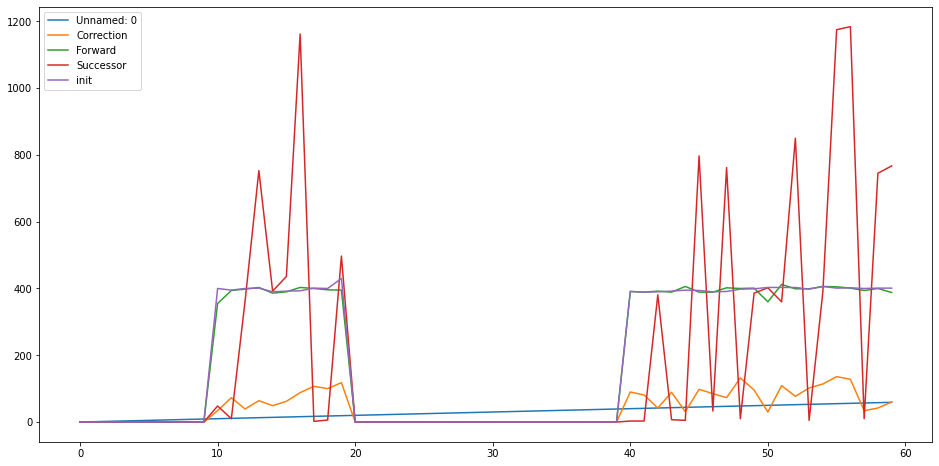

In [6]:
df.plot(figsize=(16,8))

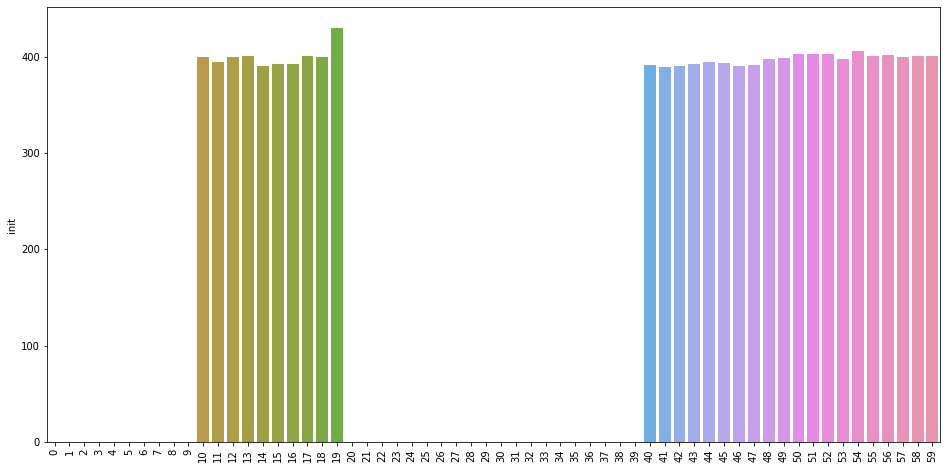

In [7]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df.index, y=df['init'])
ax.set_xticklabels(df.index, rotation=90)
plt.show()

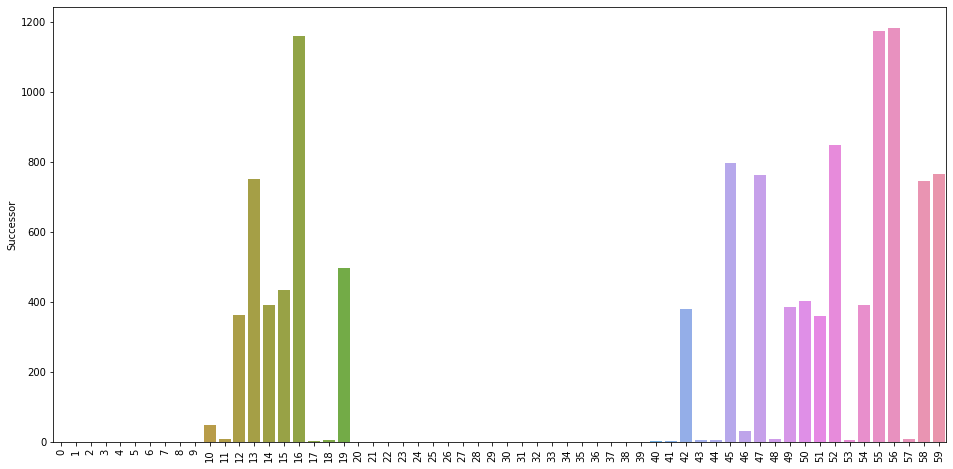

In [8]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df.index, y=df['Successor'])
ax.set_xticklabels(df.index, rotation=90)
plt.show()

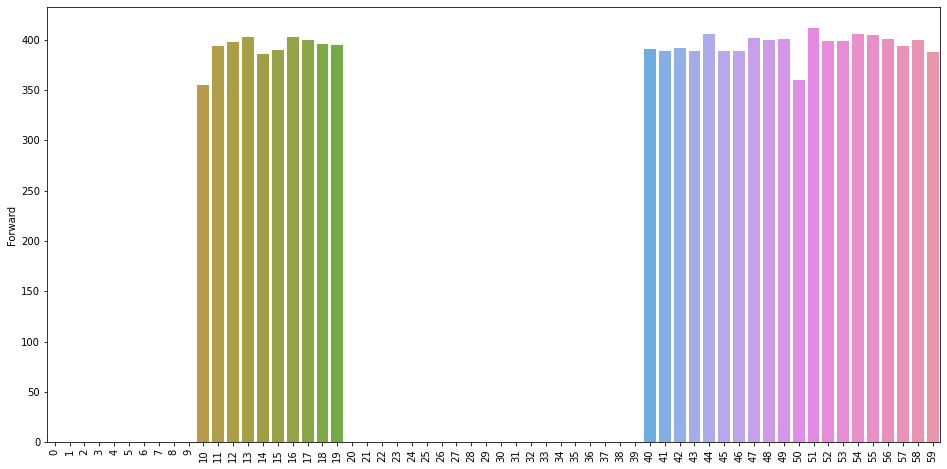

In [9]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df.index, y=df['Forward'])
ax.set_xticklabels(df.index, rotation=90)
plt.show()

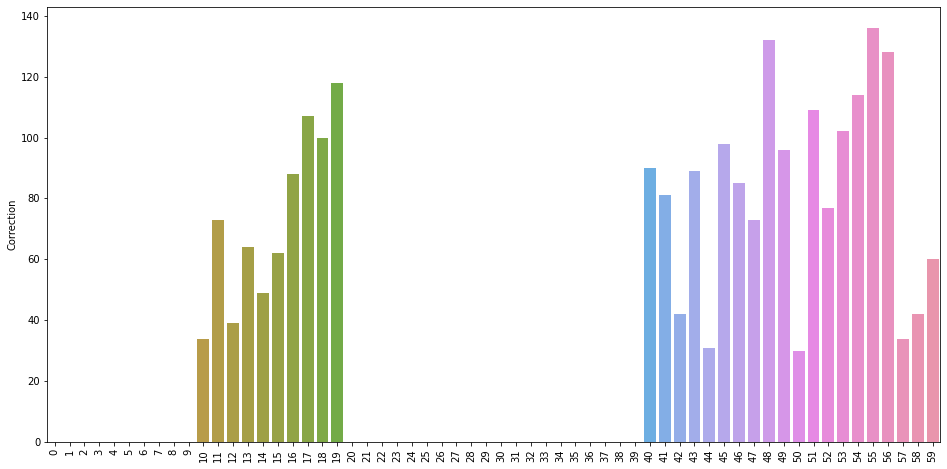

In [10]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df.index, y=df['Correction'])
ax.set_xticklabels(df.index, rotation=90)
plt.show()

<AxesSubplot:xlabel='Correction', ylabel='Forward'>

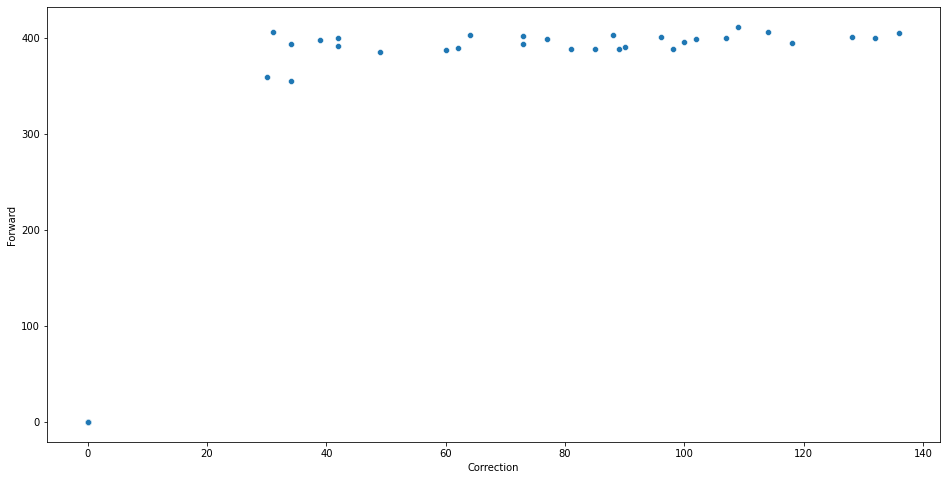

In [11]:
plt.figure(figsize=(16,8))

sns.scatterplot(x=df['Correction'], y=df['Forward'])

<AxesSubplot:xlabel='init', ylabel='Successor'>

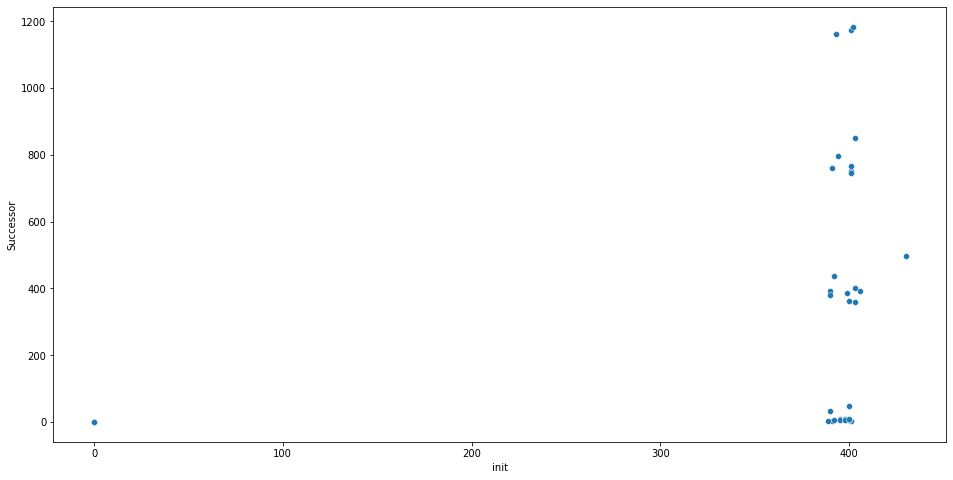

In [12]:
plt.figure(figsize=(16,8))

sns.scatterplot(x=df['init'], y=df['Successor'])


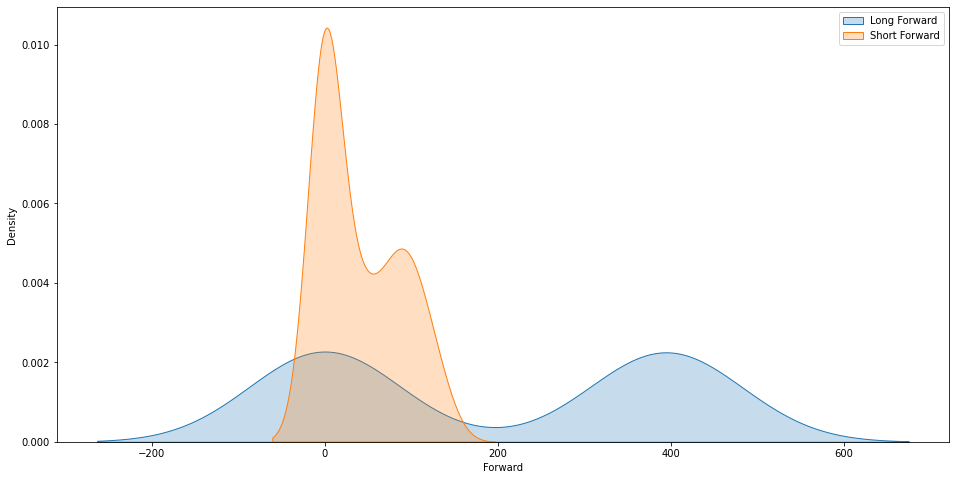

In [13]:
plt.figure(figsize=(16,8))

sns.kdeplot(data=df['Forward'], label="Long Forward", shade=True)
sns.kdeplot(data=df['Correction'], label="Short Forward", shade=True)

plt.legend()

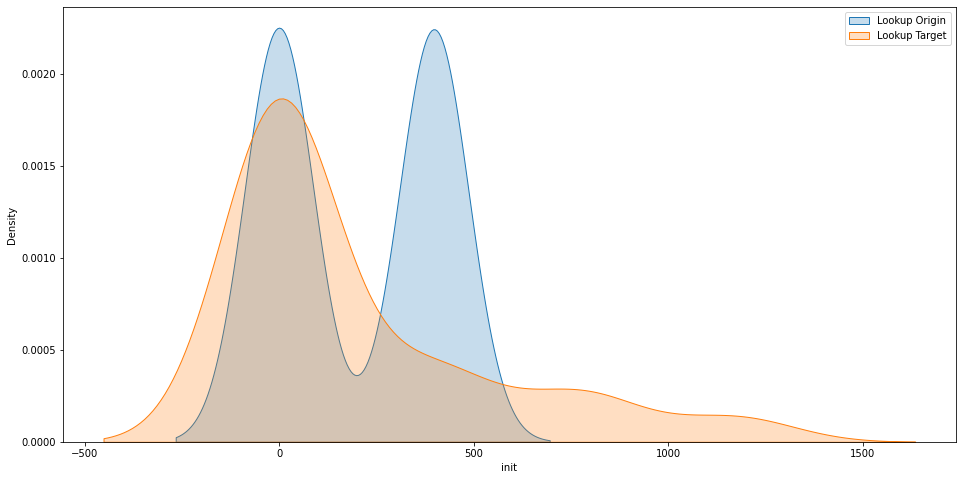

In [14]:
plt.figure(figsize=(16,8))

sns.kdeplot(data=df['init'], label="Lookup Origin", shade=True)
sns.kdeplot(data=df['Successor'], label="Lookup Target", shade=True)

plt.legend()
# what a surprise !!

In [14]:
# get the dealy for each request
import re
import os

delay_df = None
if not os.path.isfile('./delay.csv'):
    print('[log] read log file')
    with open("./log_out.log") as log:
        text = log.read()
        times = map(lambda x: float(x[0]) * (1 if x[2] == 'm' else 1000), re.findall(r"hi in (\d+(\.\d+)?)?(m)?s", text))
        delay_df = pd.DataFrame(times, columns=['delay'])
        delay_df.to_csv('delay.csv')
else:
    delay_df = pd.read_csv('delay.csv')
delay_df.describe()

[log] read log file


,delay
count,995.000000
mean,726.792289
std,287.616469
min,66.770710
25%,518.195432
50%,736.361525
75%,989.723845
max,1189.494256


<AxesSubplot:>

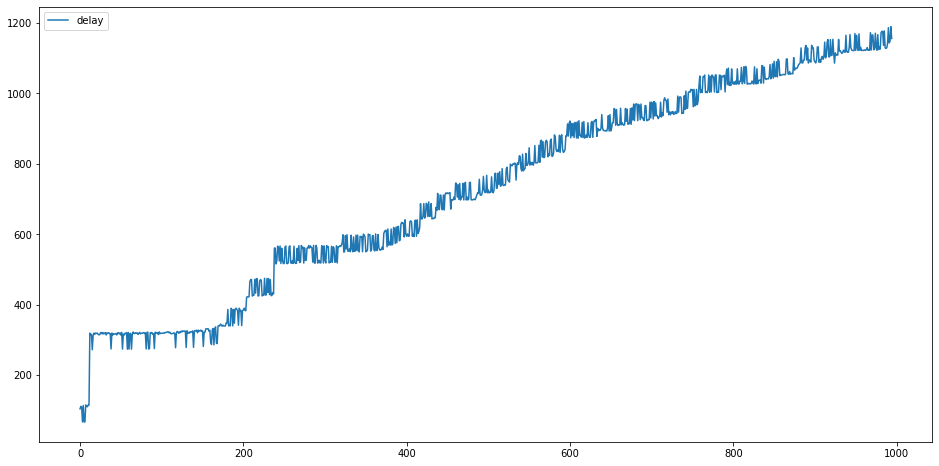

In [15]:
delay_df.plot(figsize=(16,8))